In [1]:
# Importing critical libraries for modeling
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

In [2]:
# Incorporating the data from the csv file into a dataframe
df = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\Data Mining\T1.csv')

In [3]:
df

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645904,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913


In [4]:
# Dropping the date time column from the dataset
df.drop('Date/Time', inplace = True, axis=1)

The Active Power column signifies the actual wind power recorded and is our target variable. The Independent variables we have considered for predicting this Active Wind power are Wind Speed and Wind Direction

## XGBoost Regression Algorithm

In [5]:
# Splitting the dataframe into Dependent and Independent Varaibles
y = df.iloc[:,0]
x = df[['Wind Speed (m/s)','Wind Direction (°)']]

In [6]:
# Splitting the Datasets of Dependent and Independent variables into training and test datasets 
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 100)

In [7]:
# Create the range of parameters for parameter hypertuning
param_dist = {'max_depth': stats.randint(3, 10),'learning_rate': stats.uniform(0.01, 0.1),'subsample': stats.uniform(0.5, 0.5),'n_estimators':stats.randint(50, 200)}
#param_dist = {'max_depth': stats.randint(3, 10),'n_estimators':stats.randint(50, 200)}

In [8]:
xg_reg = XGBRegressor()

In [9]:
# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(xg_reg, param_distributions=param_dist, n_iter=10, cv=5, return_train_score = True)

In [10]:
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000166B70DD550>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000166B6E9DDD0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000166B70DE890>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000166B70DE310>},
                   return_train_score=True)

In [11]:
# Finding the best parameters
random_search.best_params_

{'learning_rate': 0.08148924745624717,
 'max_depth': 4,
 'n_estimators': 121,
 'subsample': 0.8250543192021068}

In [12]:
# Finding the best model score corresponding to the best parameters
random_search.best_score_

0.9164754486953249

In [13]:
# Applying the best parameters in the model
xg_reg = XGBRegressor(learning_rate = 0.060, max_depth = 5, n_estimators = 186, subsample = 0.859)

In [14]:
# Model Fitting
xg_reg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.06, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=186, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [15]:
# Predicting the values of the test data using the XGBRegressor model xg_reg
y_pred = xg_reg.predict(x_test)

In [16]:
y_pred

array([ 462.5146  ,  332.0826  ,  351.98914 , ...,  518.7306  ,
       1066.8641  ,   17.734478], dtype=float32)

In [17]:
# Calculating the RMSE value for dependent variable of the test dataset and the predicted values
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

373.8889428168863

In [18]:
# Calculating the RMSE value for dependent variable of the test dataset and the predicted values
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

373.8889428168863

In [19]:
# Calculating the Mean Absoulte Error value for dependent variable of the test dataset and the predicted values
mae = mean_absolute_error(y_test, y_pred)
mae

153.27727034874462

In [20]:
df_test = pd.DataFrame(y_test)

In [21]:
df_test['y_pred'] = y_pred

In [22]:
df_test.rename(columns = {'LV ActivePower (kW)':'y_test'}, inplace = True)

In [23]:
df_test

,y_test,y_pred
40789,505.746094,462.514587
4724,357.548614,332.082611
43732,0.000000,351.989136
37540,583.534180,571.192627
35706,0.000000,-0.915257
...,...,...
1834,1835.322998,3211.618896
45608,3590.889893,3540.686523
44982,587.819580,518.730591
33632,959.315308,1066.864136


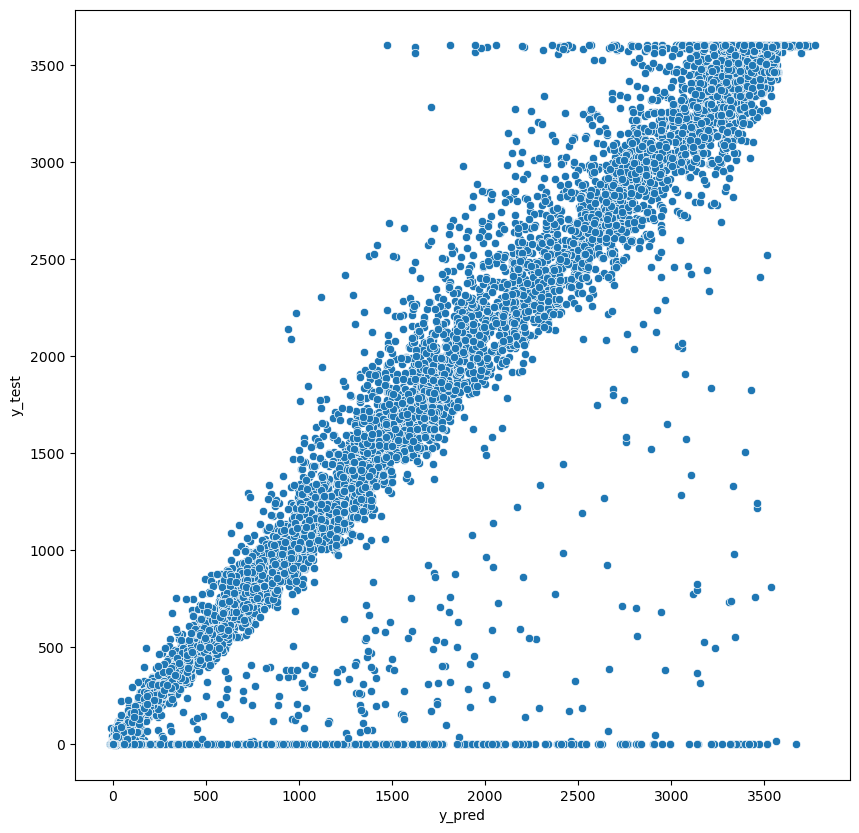

In [24]:
# Plotting the actual test values of the Dependent Variable against the predicted values
plt.figure(figsize=(10,10))
sns.scatterplot(data = df_test, y = 'y_test', x = 'y_pred')
plt.show()

In [25]:
xg_reg.feature_importances_

array([0.9848799 , 0.01512012], dtype=float32)

In [26]:
df_test['Residual'] = (df_test['y_test'] - df_test['y_pred'])

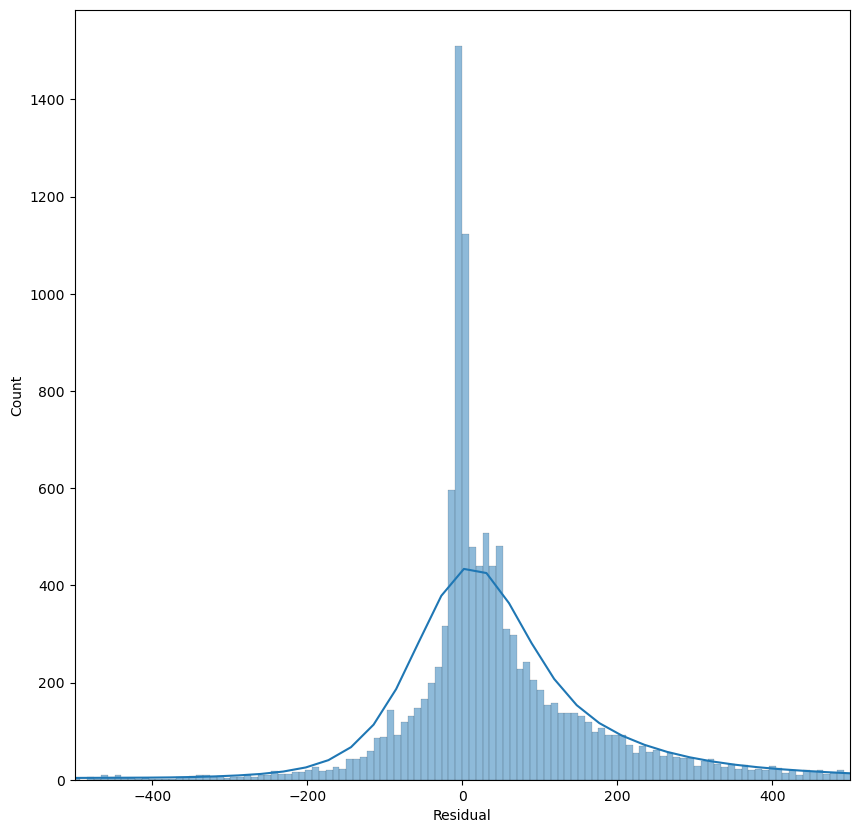

In [27]:
# Plotting the distribution of residuals (Actual - predicted)
plt.figure(figsize = (10,10))
sns.histplot(df_test['Residual'], kde = True)
plt.xlim(-500,500)
plt.show()

## Decision Tree Regressor Algorithm

In [28]:
x_train

,Wind Speed (m/s),Wind Direction (°)
6275,3.569425,91.306732
12655,2.486807,27.246790
10087,7.652987,202.977097
50059,6.447216,188.788101
45431,19.618130,189.193298
...,...,...
16304,14.538060,77.022232
79,5.364750,235.585297
12119,2.841130,228.681900
14147,3.723453,50.496632


In [29]:
len(y_train)

37897

In [30]:
x_test

,Wind Speed (m/s),Wind Direction (°)
40789,5.893086,28.491751
4724,5.252008,131.368805
43732,5.386382,33.835339
37540,6.150075,193.015198
35706,1.818552,318.989685
...,...,...
1834,11.905990,41.320869
45608,14.182970,184.819900
44982,6.060915,42.871342
33632,7.459752,59.659950


In [31]:
len(y_test)

12633

In [32]:
dt_reg = DecisionTreeRegressor()

In [33]:
param_dist = {'max_depth': stats.randint(3, 10),"max_features": stats.randint(1, 9), "min_samples_leaf": stats.randint(1, 9)}

In [34]:
# Create the RandomizedSearchCV object
random_search_dt = RandomizedSearchCV(dt_reg, param_distributions=param_dist, n_iter=10, cv=5, return_train_score = True)

In [35]:
random_search_dt.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000166B7045E10>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000166B7027C50>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000166BE687ED0>},
                   return_train_score=True)

In [36]:
# Finding the best parameters
random_search_dt.best_params_

{'max_depth': 6, 'max_features': 2, 'min_samples_leaf': 4}

In [37]:
# Finding the best model score corresponding to the best parameters
random_search_dt.best_score_

0.9120352226042673

In [38]:
# Applying the best parameters in the model
dt_reg = DecisionTreeRegressor(max_depth= 5, max_features= 2, min_samples_leaf= 8)

In [39]:
# Model Fitting
dt_reg.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5, max_features=2, min_samples_leaf=8)

In [40]:
# Predicting the values of the test data using the XGBRegressor model xg_reg
y_pred_dt = dt_reg.predict(x_test)

In [41]:
df_dt_test = pd.DataFrame(y_test)
df_dt_test['y_pred'] = y_pred_dt
df_dt_test.rename(columns = {'LV ActivePower (kW)':'y_test'}, inplace = True)
df_dt_test

,y_test,y_pred
40789,505.746094,501.236114
4724,357.548614,294.032826
43732,0.000000,389.822890
37540,583.534180,501.236114
35706,0.000000,4.113697
...,...,...
1834,1835.322998,3303.256808
45608,3590.889893,3492.554094
44982,587.819580,501.236114
33632,959.315308,1082.041347


In [42]:
# Calculating the RMSE value for dependent variable of the test dataset and the predicted values
mse = mean_squared_error(df_dt_test['y_test'], df_dt_test['y_pred'])
rmse = np.sqrt(mse)
rmse

383.7695746749112

In [43]:
# Calculating the Mean Absoulte Error value for dependent variable of the test dataset and the predicted values
mae = mean_absolute_error(df_dt_test['y_test'], df_dt_test['y_pred'])
mae 

161.6912548583305

In [44]:
df_dt_test['residuals'] = df_dt_test['y_test'] - df_dt_test['y_pred']

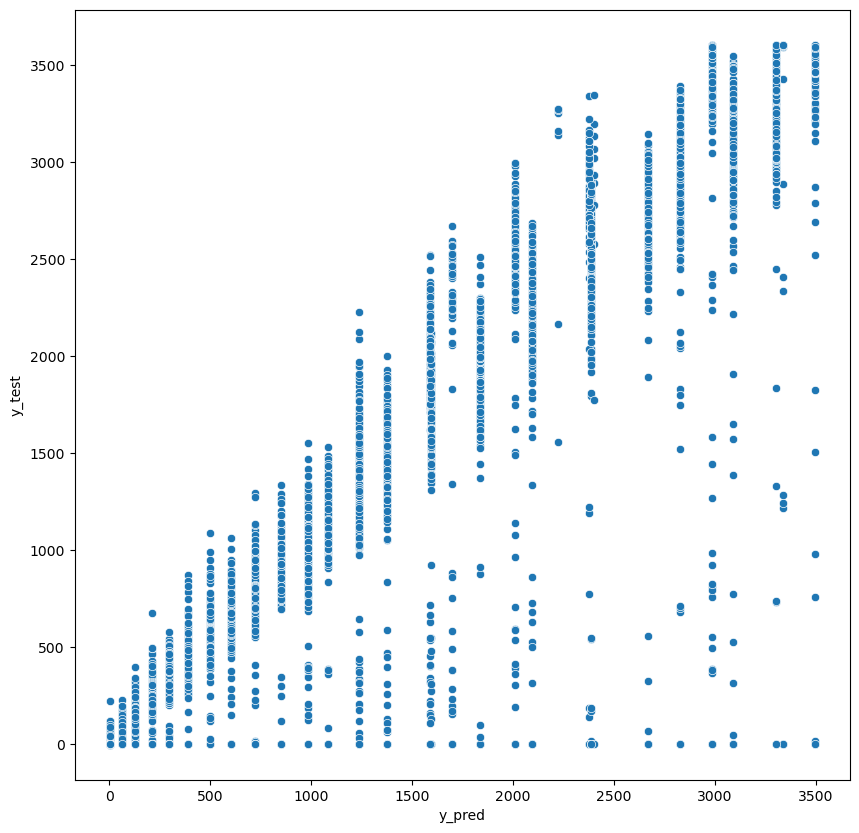

In [45]:
# Plotting the actual test values of the Dependent Variable against the predicted values
plt.figure(figsize=(10,10))
sns.scatterplot(data = df_dt_test, y = 'y_test', x = 'y_pred')
plt.show()

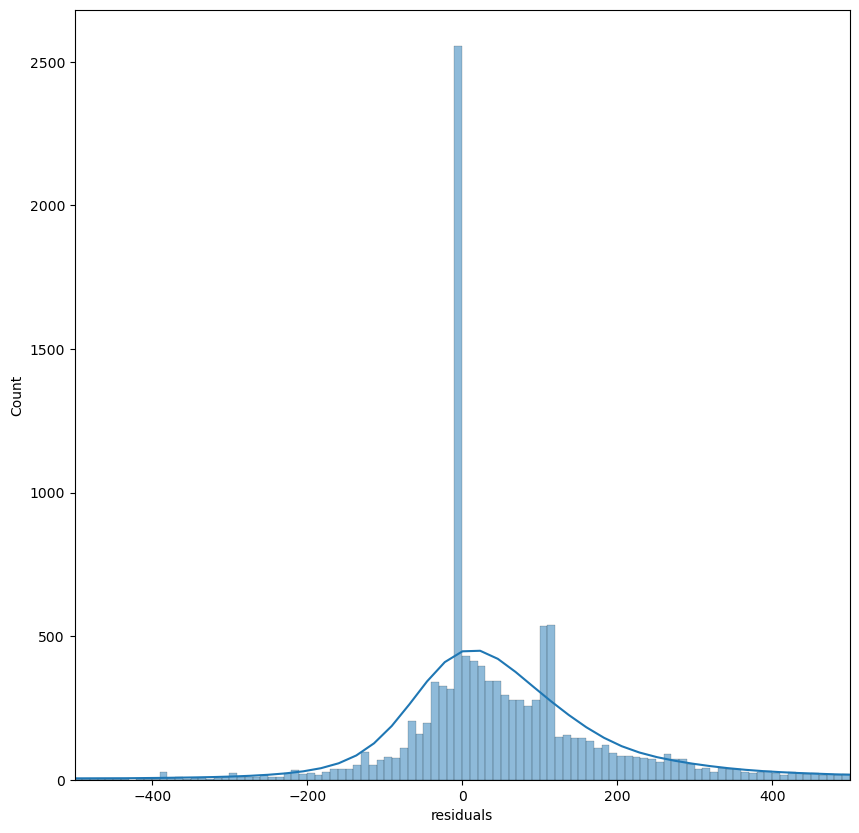

In [46]:
# Plotting the distribution of residuals (Actual - predicted) 
plt.figure(figsize=(10,10))
sns.histplot(df_dt_test['residuals'], kde = True)
plt.xlim(-500,500)
plt.show()

In [47]:
dt_reg.feature_importances_

array([0.99582165, 0.00417835])